In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


 ## Autoencoders, using TensorFlow



In [ ]:
import tensorflow as tf


tf.__version__

'1.15.2'

####Import MNIST dataset


In [ ]:
import os
import numpy as np
import matplotlib as mpb
import matplotlib.pyplot as plt
from keras.datasets import mnist


mpb.rc('axes', labelsize=15)
mpb.rc('xtick', labelsize=12)
mpb.rc('ytick', labelsize=12)


(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train =  X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Normalization
X_train = X_train / 255
X_test = X_test / 255

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
print(Y_train.shape)
print(Y_test.shape)

(60000,)
(10000,)


### Building the model 

We are going to define variables, placeholders and architecture of the model 
before running it in a tensorflow session.


#### Define X, y the input and the output of the model respectively


In [ ]:
#placeholder
X = tf.placeholder(
    tf.float32,
    shape=(None, 784)
)


#### Below we define the dimensions of the layers and the respective Weigths and biases of the model with given number of neurons in layers.

In [ ]:
input_dim = 784
lay1_dim = 256
lay2_dim = 64
lay3_dim = 256
output_dim = 784

# encoder weights
Weight_encoder = tf.Variable(
    tf.random_normal(
        shape=(input_dim, lay1_dim)
    )
)

Weight_encoder1 = tf.Variable(
    tf.random_normal(
        shape=(lay1_dim, lay2_dim)
    )
)

# decoder weights
Weight_decoder = tf.Variable(
    tf.random_normal(
        shape=(lay2_dim, lay3_dim)
    )
)

Weight_decoder1 = tf.Variable(
    tf.random_normal(
        shape=(lay3_dim, output_dim)
    )
)

# encoder biases 
bias_encoder = tf.Variable(
    tf.zeros(
        lay1_dim
    )
)

bias_encoder1 = tf.Variable(
    tf.zeros(
        lay2_dim
    )
)       

# decoder biases
bias_decoder = tf.Variable(
    tf.zeros(
        lay3_dim
    )
)

bias_decoder1 = tf.Variable(
    tf.zeros(
        output_dim
    )
)       

#### Hyperparameters



In [ ]:
Learning_Rate = 0.01
num_epoch = 10
Batch_Size = 256

Building an Encoder and Decoder

An autoencoder is composed of two part:
* Encoder: convert the input to an internal representation: h = f(x).
* Decoder: convert the internal representation to the outputs.



In [ ]:
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x,Weight_encoder),bias_encoder))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, Weight_encoder1), bias_encoder1))    
    
    return layer_2
    
def decoder(h):
    # Decoder Hidden layer with sigmoid activation #1
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(h, Weight_decoder), tf.cast(bias_decoder, tf.float32)))
    layer_4 = tf.nn.sigmoid(tf.add(tf.matmul(layer_3, Weight_decoder1), tf.cast(bias_decoder1, tf.float32)))
    
    return layer_4

# Define model

Encoder = encoder(X)
Decoder = decoder(Encoder)

# prediction and target

X_pred, X_true = Decoder , X

# Loss
loss = tf.reduce_mean(
    tf.pow(
        X_true - X_pred, 2
    )
)
optimizer = tf.train.RMSPropOptimizer(Learning_Rate).minimize(loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Training the model 



In [ ]:
#X_train.shape[0] // Batch_Size

234

In [ ]:
sz = 12
ls = list(range(60))
for i in range(5):                  
  start_index = i * sz              
  stop_index = sz + start_index     
  print(ls[start_index:stop_index])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
[48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


In [ ]:
X_train[0:3,:].shape


(3, 784)

In [ ]:
init = tf.initialize_all_variables()

with tf.Session() as sess:
  sess.run(init)
  print('Training...')

  train_loss = 0

  #part for train dataset
  for i in range(1, num_epoch+1):

    num_batches = X_train.shape[0] // Batch_Size

    #do loop for batches:
    for batch in range(num_batches):

      s = batch * Batch_Size
      t = s + Batch_Size
      batch_x = X_train[s:t, :]

      #do gradient descent step
      sess.run(optimizer,  feed_dict={
        X:batch_x
      })

      decoded_imgs = Decoder.eval({X: batch_x})
      feed_dict = {
        X_true: batch_x,
        X_pred: decoded_imgs
      }
      train_loss = train_loss + loss.eval(feed_dict)

    mse = train_loss / num_batches

    #evaluate for test dataset
    decoded_imgs = Decoder.eval({X: X_test})
    mse_val = loss.eval(
        {
            X_true: X_test,
            X_pred: decoded_imgs
        }
    )

    print(
        'E:{} \t TrL:{:0.4f} \t VaL:{:0.4f}'.format(
            i,
            mse,
            mse_val
        )
    )

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Training...
E:1 	 TrL:0.3476 	 VaL:0.1744
E:2 	 TrL:0.4986 	 VaL:0.1479
E:3 	 TrL:0.6371 	 VaL:0.1377
E:4 	 TrL:0.7668 	 VaL:0.1335
E:5 	 TrL:0.8929 	 VaL:0.1287
E:6 	 TrL:1.0157 	 VaL:0.1267
E:7 	 TrL:1.1347 	 VaL:0.1234
E:8 	 TrL:1.2488 	 VaL:0.1172
E:9 	 TrL:1.3590 	 VaL:0.1090
E:10 	 TrL:1.4655 	 VaL:0.1067


In [ ]:
#decoded_imgs.shape

(10000, 784)


#### Display the original and the reconstructed model for a few examples

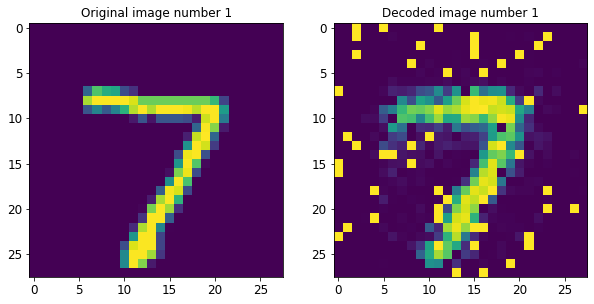

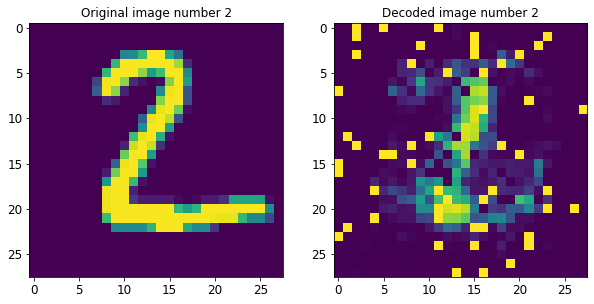

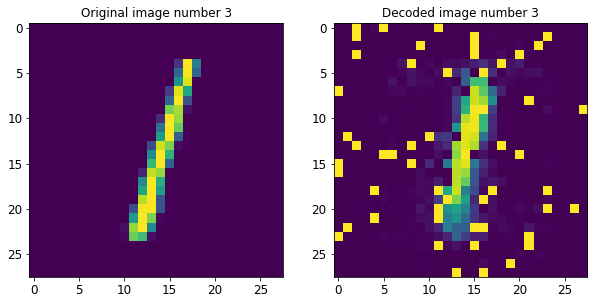

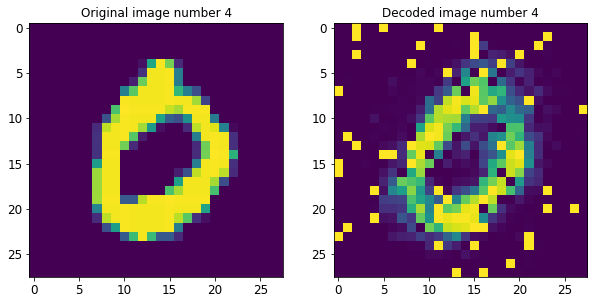

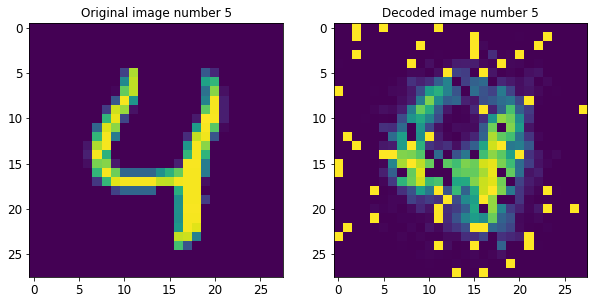

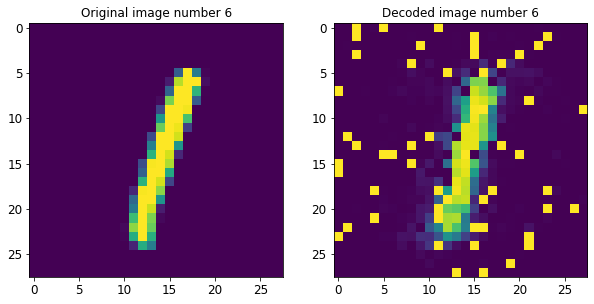

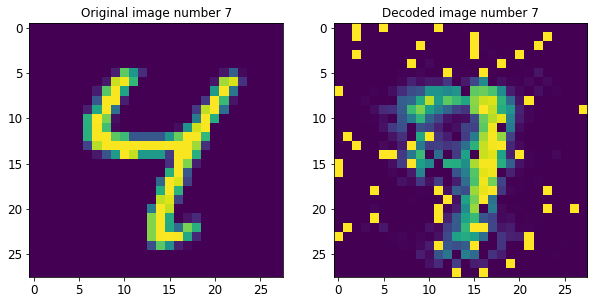

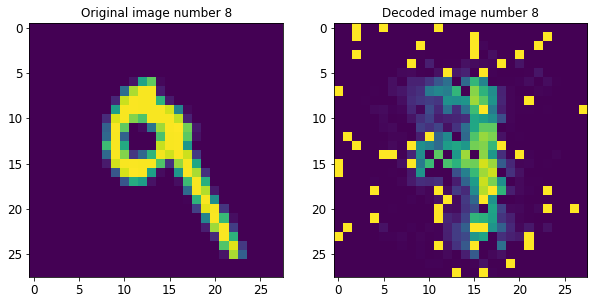

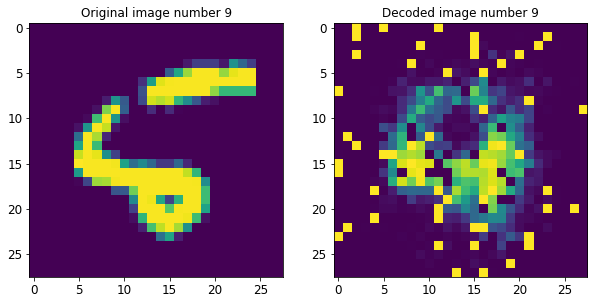

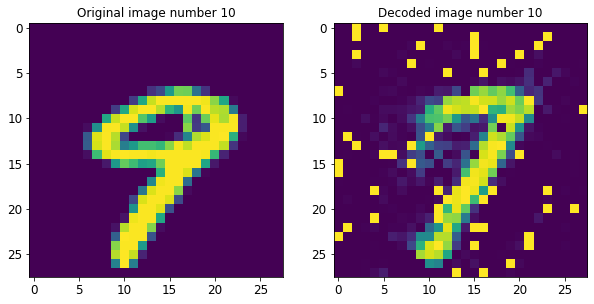

In [ ]:
examples_to_show = 10

for i in range(examples_to_show):
  plt.figure(figsize=(10,10))
  image = X_test[i]
  image=image.reshape(28,28)
  decoded_image=decoded_imgs[i]
  decoded_image=decoded_image.reshape(28,28)
  plt.subplot(1,2,1)
  plt.title(f'Original image number {i+1}')
  plt.imshow(image)

  plt.subplot(1,2,2)
  plt.title(f'Decoded image number {i+1}')
  plt.imshow(decoded_image)
  plt.show()

#### 7-Change the hyperparameter, the number of layer in other to reach better reconstructed images and display the result. 

In [ ]:
# change the hyperparameters 

Learning_Rate = 0.07
num_epoch = 10
Batch_Size = 32

In [ ]:
init = tf.initialize_all_variables()

with tf.Session() as sess:
  sess.run(init)
  print('Training...')

  train_loss = 0

  #part for train dataset
  for i in range(1, num_epoch+1):

    num_batches = X_train.shape[0] // Batch_Size

    #do loop for batches:
    for batch in range(num_batches):

      s = batch * Batch_Size
      t = s + Batch_Size
      batch_x = X_train[s:t, :]

      #do gradient descent step
      sess.run(optimizer,  feed_dict={
        X:batch_x
      })

      decoded_imgs = Decoder.eval({X: batch_x})
      feed_dict = {
        X_true: batch_x,
        X_pred: decoded_imgs
      }
      train_loss = train_loss + loss.eval(feed_dict)

    mse = train_loss / num_batches

    #evaluate for test dataset
    decoded_imgs = Decoder.eval({X: X_test})
    mse_val = loss.eval(
        {
            X_true: X_test,
            X_pred: decoded_imgs
        }
    )

    print(
        'E:{} \t TrL:{:0.4f} \t VaL:{:0.4f}'.format(
            i,
            mse,
            mse_val
        )
    )

Training...
E:1 	 TrL:0.1473 	 VaL:0.1103
E:2 	 TrL:0.2386 	 VaL:0.0917
E:3 	 TrL:0.3161 	 VaL:0.0801
E:4 	 TrL:0.3864 	 VaL:0.0726
E:5 	 TrL:0.4535 	 VaL:0.0677
E:6 	 TrL:0.5166 	 VaL:0.0641
E:7 	 TrL:0.5770 	 VaL:0.0623
E:8 	 TrL:0.6354 	 VaL:0.0603
E:9 	 TrL:0.6921 	 VaL:0.0586
E:10 	 TrL:0.7462 	 VaL:0.0568


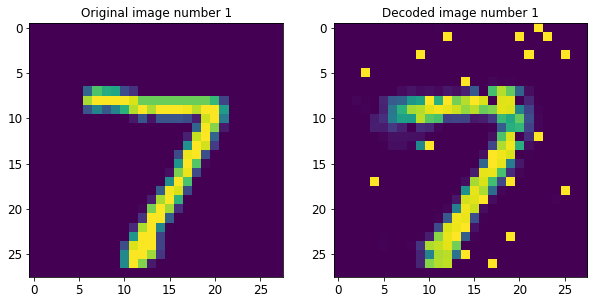

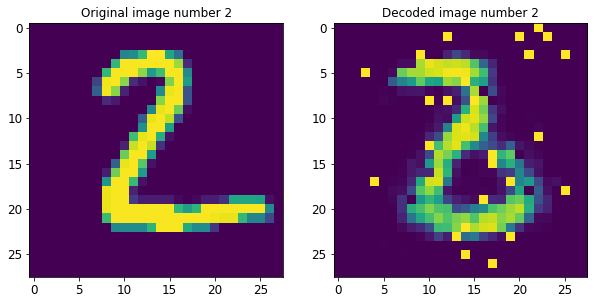

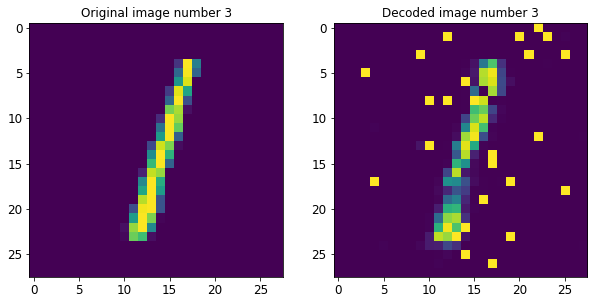

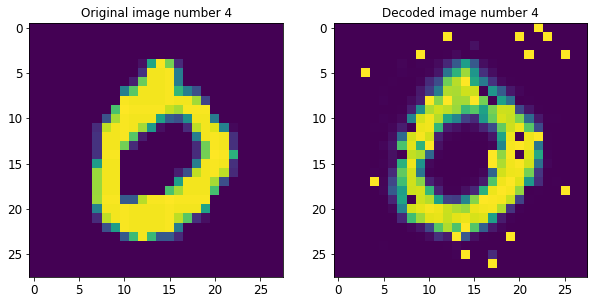

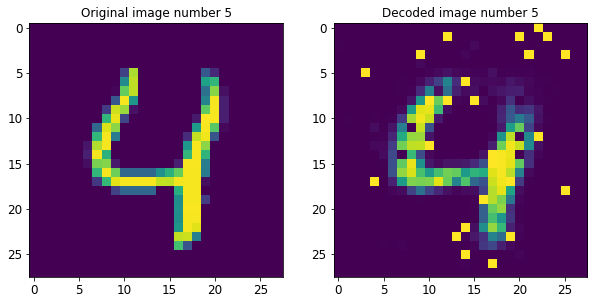

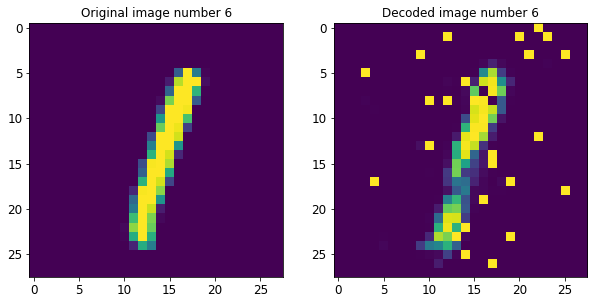

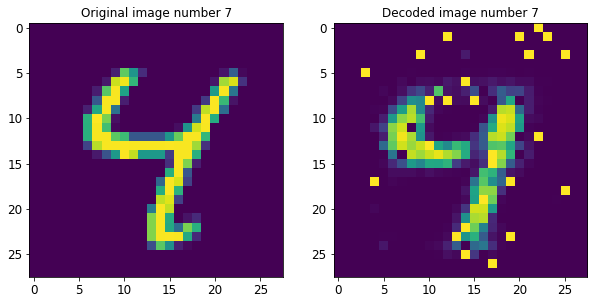

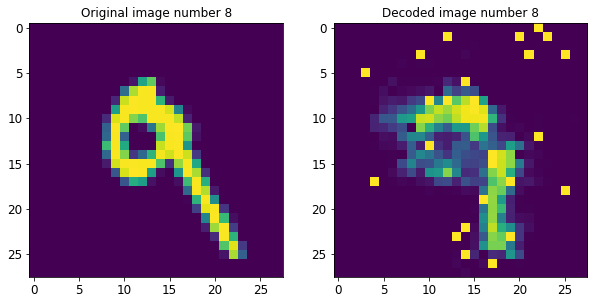

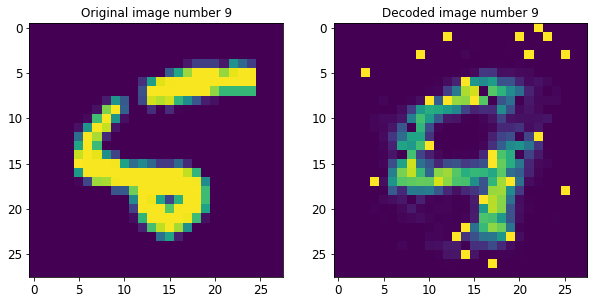

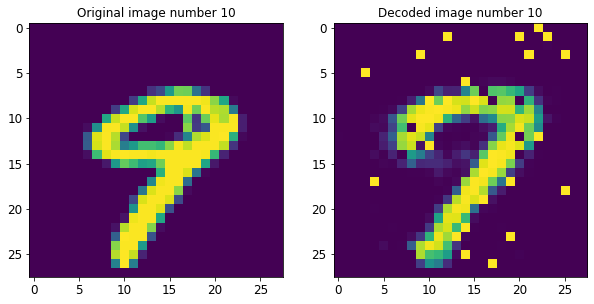

In [ ]:
# display some images and the corresponding reconstructed ones

examples_to_show = 10

for i in range(examples_to_show):
  plt.figure(figsize=(10,10))
  image = X_test[i]
  image=image.reshape(28,28)
  decoded_image=decoded_imgs[i]
  decoded_image=decoded_image.reshape(28,28)
  plt.subplot(1,2,1)
  plt.title(f'Original image number {i+1}')
  plt.imshow(image)

  plt.subplot(1,2,2)
  plt.title(f'Decoded image number {i+1}')
  plt.imshow(decoded_image)
  plt.show()